In [28]:
import pandas as pd
import csv

r1 = pd.read_csv('1.csv').rename(columns={'Country/Territory': 'Country'})
r2 = pd.read_csv('2.csv')
all_data = pd.merge(r1[['Country','PR rating','CL rating']], r2[['Country', 'Average Monthly Net Salary (US$)']], how='inner', on=['Country'])
all_data.to_csv("HF_salary.csv")
df = pd.read_csv('HF_salary.csv')
sorted_df1 = df.sort_values(by=["Average Monthly Net Salary (US$)"], ascending=False)
sorted_df1 = sorted_df1.drop('Unnamed: 0',1)
sorted_df1.to_csv('HF_salary_sorted.csv', index=False)
sorted_df1

,Country,PR rating,CL rating,Average Monthly Net Salary (US$)
87,Switzerland,1,1,6142.10
79,Singapore,4,4,4350.79
4,Australia,1,1,4218.89
95,United States,2,2,3721.64
93,United Arab Emirates,7,6,3663.27
...,...,...,...,...
98,Venezuela,7,6,199.22
61,Nepal,3,4,198.48
64,Nigeria,4,5,166.33
68,Pakistan,5,5,163.17


In [29]:
r1 = pd.read_csv('1.csv').rename(columns={'Country/Territory': 'Country'})
r2 = pd.read_csv('3.csv').rename(columns={'name': 'Country'})
all_data = pd.merge(r1[['Country','PR rating','CL rating']], r2[['Country', 'gdp']], how='inner', on=['Country'])
all_data.to_csv("HF_gdp.csv")
df = pd.read_csv('HF_gdp.csv')
sorted_df2 = df.sort_values(by=["gdp"], ascending=False)
sorted_df2 = sorted_df2.drop('Unnamed: 0',1)
sorted_df2.to_csv('HF_gdp_sorted.csv', index=False)
sorted_df2

,Country,PR rating,CL rating,gdp
88,United States,2,2,20580223.0
15,China,7,6,13608152.0
44,Japan,1,1,4971323.0
29,Germany,1,1,3949549.0
87,United Kingdom,1,1,2855297.0
...,...,...,...,...
0,Albania,3,3,15059.0
53,Malta,2,1,14549.0
54,Mauritius,1,2,14220.0
3,Armenia,4,4,12433.0


In [54]:
r1 = pd.read_csv('1.csv').rename(columns={'Country/Territory': 'Country'})
r2 = pd.read_csv('3.csv').rename(columns={'name': 'Country'})
all_data = pd.merge(r1[['Country','PR rating','CL rating']], r2[['Country', 'pop_density']], how='inner', on=['Country'])
all_data.to_csv("HF_popdensity.csv")
df = pd.read_csv('HF_popdensity.csv')
sorted_df3 = df.sort_values(by=["pop_density"], ascending=False)
sorted_df3 = sorted_df3.drop('Unnamed: 0',1)
sorted_df3.to_csv('HF_popdensity_sorted.csv', index=False)
sorted_df3

,Country,PR rating,CL rating,pop_density
74,Singapore,4,4,8357.6
34,Hong Kong,6,4,7140.0
7,Bahrain,7,6,2238.9
53,Malta,2,1,1379.8
8,Bangladesh,5,5,1265.2
...,...,...,...,...
62,Norway,1,1,14.8
46,Kazakhstan,7,5,7.0
13,Canada,1,1,4.2
36,Iceland,1,1,3.4


In [55]:
from sklearn.model_selection import train_test_split
X = sorted_df1[['PR rating','CL rating']]
y = sorted_df1['Average Monthly Net Salary (US$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)
y_pred
print('Coefficients:', linear_regressor.coef_)
print('Intercept:', linear_regressor.intercept_)
print('Linear Regression R-squared:', linear_regressor.score(X, y))

Coefficients: [ 307.73887591 -603.16650081]
Intercept: 2157.487632554392
Linear Regression R-squared: 0.20150360116048394


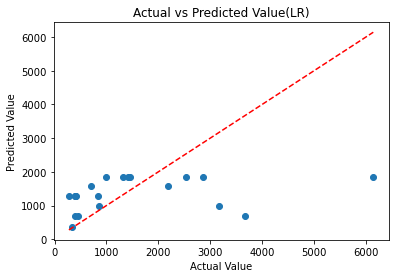

In [56]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value(LR)')
plt.show()

Ridge Regression R-squared: 0.07649564124537522


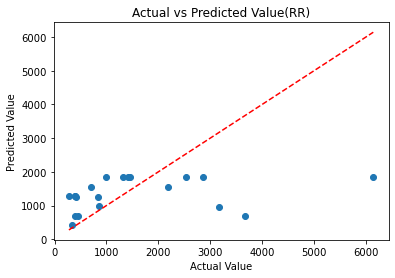

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model_ridge = Ridge(alpha=1).fit(X_train, y_train)
y_pred2 = model_ridge.predict(X_test)
r2 = r2_score(y_test, y_pred2)
print('Ridge Regression R-squared:', r2)
plt.scatter(y_test, y_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value(RR)')
plt.show()

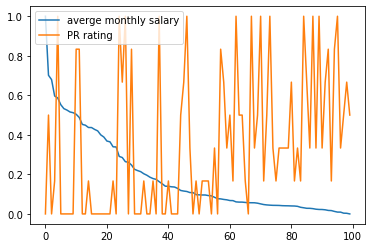

In [90]:
df1 = pd.read_csv('HF_salary.csv')
s = pd.Series(sorted_df1['Average Monthly Net Salary (US$)'])
a = pd.Series(sorted_df1['PR rating'])
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Normalize the Series
normalized = scaler.fit_transform(s.values.reshape(-1, 1))
normalized_cl = scaler.fit_transform(a.values.reshape(-1,1))
# Convert the normalized values back to a pandas Series
normalized_series = pd.Series(normalized.squeeze())
normalized_cl = pd.Series(normalized_cl.squeeze())
fig, ax = plt.subplots()
ax.plot(normalized_series, label = "averge monthly salary")
ax.plot(normalized_cl, label = "PR rating")
ax.legend()
plt.show()

In [59]:
r1 = pd.read_csv('HF_salary.csv')
r2 = pd.read_csv('3.csv').rename(columns={'name': 'Country'})

all_data = pd.merge(r1[['Country','PR rating','CL rating','Average Monthly Net Salary (US$)']], r2[['Country', 'gdp','pop_density']], how='inner', on=['Country'])
all_data.to_csv("final.csv",index = False)
all_data

,Country,PR rating,CL rating,Average Monthly Net Salary (US$),gdp,pop_density
0,Albania,3,3,404.02,15059.0,105.0
1,Algeria,6,5,249.67,173757.0,18.4
2,Argentina,2,2,427.94,518475.0,16.5
3,Armenia,4,4,469.34,12433.0,104.1
4,Australia,1,1,4218.89,1453871.0,3.3
...,...,...,...,...,...,...
86,United Arab Emirates,7,6,3663.27,414179.0,118.3
87,United Kingdom,1,1,2764.57,2855297.0,280.6
88,United States,2,2,3721.64,20580223.0,36.2
89,Uruguay,1,1,691.45,59597.0,19.8


In [60]:
df11 = pd.read_csv('final.csv',index_col=0)
df11.corr(method ='pearson')

,PR rating,CL rating,Average Monthly Net Salary (US$),gdp,pop_density
PR rating,1.000000,0.936079,-0.273024,-0.017288,0.182169
CL rating,0.936079,1.000000,-0.377514,-0.030718,0.116334
Average Monthly Net Salary (US$),-0.273024,-0.377514,1.000000,0.256143,0.286091
gdp,-0.017288,-0.030718,0.256143,1.000000,-0.039494
pop_density,0.182169,0.116334,0.286091,-0.039494,1.000000


In [69]:
from sklearn.model_selection import train_test_split
X1 = sorted_df2[['PR rating','CL rating']]
y1 = sorted_df2['gdp']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train1,y_train1)
y_predCL = linear_regressor.predict(X_test1)
y_predCL
print('Coefficients:', linear_regressor.coef_)
print('Intercept:', linear_regressor.intercept_)
print('Linear Regression R-squared:', linear_regressor.score(X, y))

Coefficients: [ 87679.46421553 -39851.41696405]
Intercept: 548673.1485804939
Linear Regression R-squared: -349181.75938459655


In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model_ridge = Ridge(alpha=1).fit(X_train1, y_train1)
y_predCL2 = model_ridge.predict(X_test1)
r2 = r2_score(y_test1, y_predCL2)
print('Ridge Regression R-squared:', r2)

Ridge Regression R-squared: -0.043203372440365984


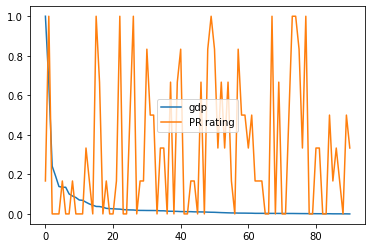

In [89]:
df2 = pd.read_csv('HF_gdp.csv')
s = pd.Series(sorted_df2['gdp'])
a = pd.Series(sorted_df2['PR rating'])
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Normalize the Series
normalized = scaler.fit_transform(s.values.reshape(-1, 1))
normalized_cl = scaler.fit_transform(a.values.reshape(-1,1))
# Convert the normalized values back to a pandas Series
normalized_series = pd.Series(normalized.squeeze())
normalized_cl = pd.Series(normalized_cl.squeeze())
fig, ax = plt.subplots()
ax.plot(normalized_series, label = "gdp")
ax.plot(normalized_cl, label = "PR rating")
ax.legend()
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
X2 = sorted_df3[['PR rating','CL rating']]
y2 = sorted_df3['pop_density']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train2,y_train2)
y_predPR = linear_regressor.predict(X_test)
y_predPR
print('Coefficients:', linear_regressor.coef_)
print('Intercept:', linear_regressor.intercept_)
print('Linear Regression R-squared:', linear_regressor.score(X2, y2))

Coefficients: [ 371.90336076 -352.2007244 ]
Intercept: 243.54224102290664
Linear Regression R-squared: 0.050215931806084746


In [81]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model_ridge = Ridge(alpha=1).fit(X_train2, y_train2)
y_predPR2 = model_ridge.predict(X_test2)
r2 = r2_score(y_test2, y_predPR2)
print('Ridge Regression R-squared:', r2)

Ridge Regression R-squared: -0.032305470950621196


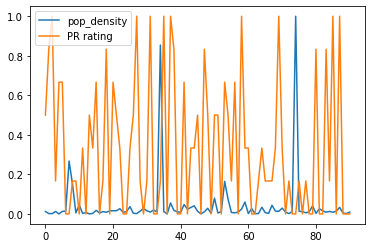

In [87]:
df3 = pd.read_csv('HF_popdensity.csv') 
s = pd.Series(df3['pop_density'])
a = pd.Series(sorted_df3['PR rating'])
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Normalize the Series
normalized = scaler.fit_transform(s.values.reshape(-1, 1))
normalized_cl = scaler.fit_transform(a.values.reshape(-1,1))
# Convert the normalized values back to a pandas Series
normalized_series = pd.Series(normalized.squeeze())
normalized_cl = pd.Series(normalized_cl.squeeze())
fig, ax = plt.subplots()
ax.plot(normalized_series, label = "pop_density")
ax.plot(normalized_cl, label = "PR rating")
ax.legend()
plt.show()